# Renewind : NN for predicting the failure of components

# Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental
impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S. Department
of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component
capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted
accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various
environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine
(gearbox, tower, blades, break, etc.).

# Objective

"ReneWind" is a company working on improving the machinery/processes involved in the production of wind energy using machine
learning and has collected data on generator failure of wind turbines using sensors. They have shared a ciphered version of the data,
as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors,
20000 observations in the training set, and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the
generators can be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repair costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.`
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the
cost of repair.

"1" in the target variable should be considered as "failure" and "0" represents "No failure".

In [44]:
## importing neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

pd.set_option('display.max_columns', 50)  # Displays up to 50 columns

import warnings

# Suppress a specific warning type
warnings.filterwarnings('ignore', category=UserWarning)  # Example: Suppressing

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# loading the dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Train.csv')

train_df = train.copy() #creating a copy of dataset

test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Test.csv')

test_df = test.copy() #creating a copy of dataset

In [47]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,-5.714719,0.735893,0.981251,1.417884,-3.375815,-3.047303,0.306194,2.914097,2.269979,4.394876,-2.388299,0.646388,-1.190508,3.132986,0.665277,-2.510846,-0.036744,0.726218,-3.982187,-1.072638,1.667098,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,1.914465,-0.951458,-1.255259,-2.706522,0.193223,-4.769379,-2.205319,0.907716,0.756894,-5.833678,-3.065122,1.596647,-1.757311,1.766444,-0.267098,3.625036,1.500346,-0.585712,0.783034,-0.201217,0.024883,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,-0.770673,1.106718,1.144261,0.943301,-3.163804,-4.247825,-4.038909,3.688534,3.311196,1.059002,-2.143026,1.650120,-1.660592,1.679910,-0.450782,-4.550695,3.738779,1.134404,-2.033531,0.840839,-1.600395,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,-3.053023,0.459719,2.704527,-0.636086,-0.453717,-3.174046,-3.404347,-1.281536,1.582104,-1.951778,-3.516555,-1.206011,-5.627854,-1.817653,2.124142,5.294642,4.748137,-2.308536,-3.962977,-6.028730,4.948770,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,1.998347,4.723757,0.709113,-1.989432,-2.632684,4.184447,2.245356,3.734452,-6.312766,-5.379918,-0.886667,2.061694,9.445586,4.489976,-3.945144,4.582065,-8.780422,-3.382967,5.106507,6.787513,2.044184,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [48]:
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,-5.122874,1.017021,4.818549,3.269001,-2.984330,1.387370,2.032002,-0.511587,-1.023069,7.338733,-2.242244,0.155489,2.053786,-2.772273,1.851369,-1.788696,-0.277282,-1.255143,-3.832886,-1.504542,1.586765,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,1.796544,0.410490,0.638328,-1.389600,-1.883410,-5.017922,-3.827238,2.418060,1.762285,-3.242297,-3.192960,1.857454,-1.707954,0.633444,-0.587898,0.083683,3.013935,-0.182309,0.223917,0.865228,-1.782158,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,-4.928214,3.565070,-0.449329,-0.656246,-0.166537,-1.630207,2.291865,2.396492,0.601278,1.793534,-2.120238,0.481968,-0.840707,1.790197,1.874395,0.363930,-0.169063,-0.483832,-2.118982,-2.156586,2.907291,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,-5.578345,-0.850662,2.590525,0.767418,-2.390809,-2.341961,0.571875,-0.933751,0.508677,1.210715,-3.259524,0.104587,-0.658875,1.498107,1.100305,4.142988,-0.248446,-1.136516,-5.355810,-4.545931,3.808667,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,-0.530016,1.374544,-0.650941,-1.679466,-0.379220,-4.443143,3.893857,-0.607640,2.944931,0.367233,-5.789081,4.597528,4.450264,3.224941,0.396701,0.247765,-2.362047,1.079378,-0.473076,2.242810,-3.591421,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [49]:
print(train_df.shape)
test_df.shape

(20000, 41)


(5000, 41)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [52]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [53]:
# Check for missing values
train_df.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [54]:
test_df.isnull().sum()

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [55]:
# Remove rows with any missing values
train_df = train_df.dropna()

# Remove columns with any missing values
test_df= test_df.dropna()


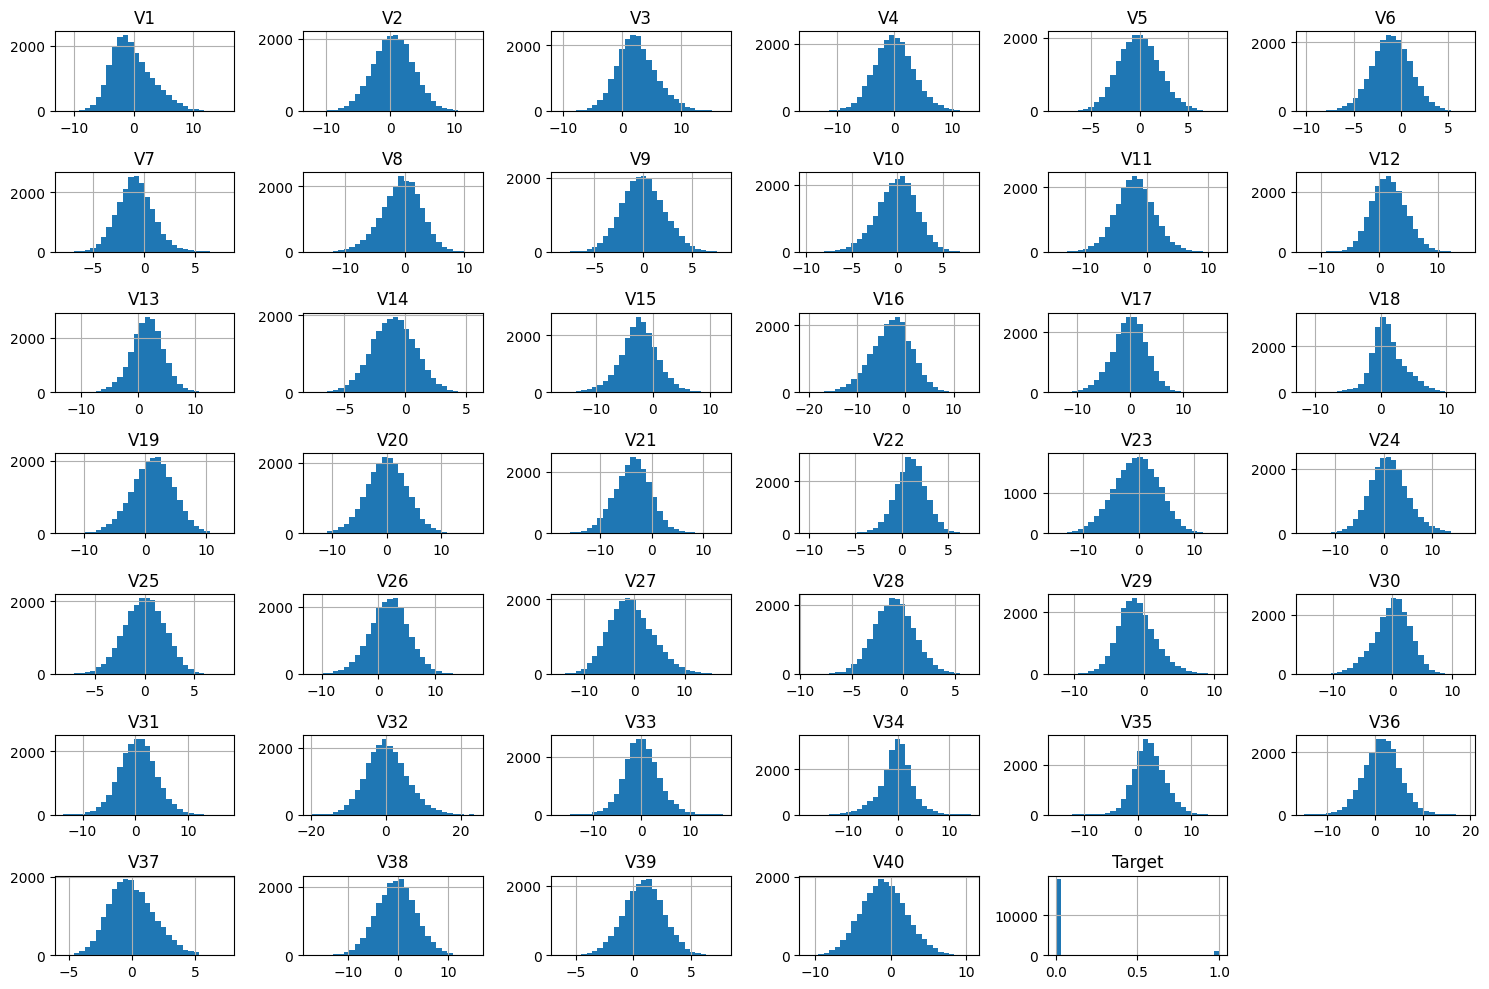

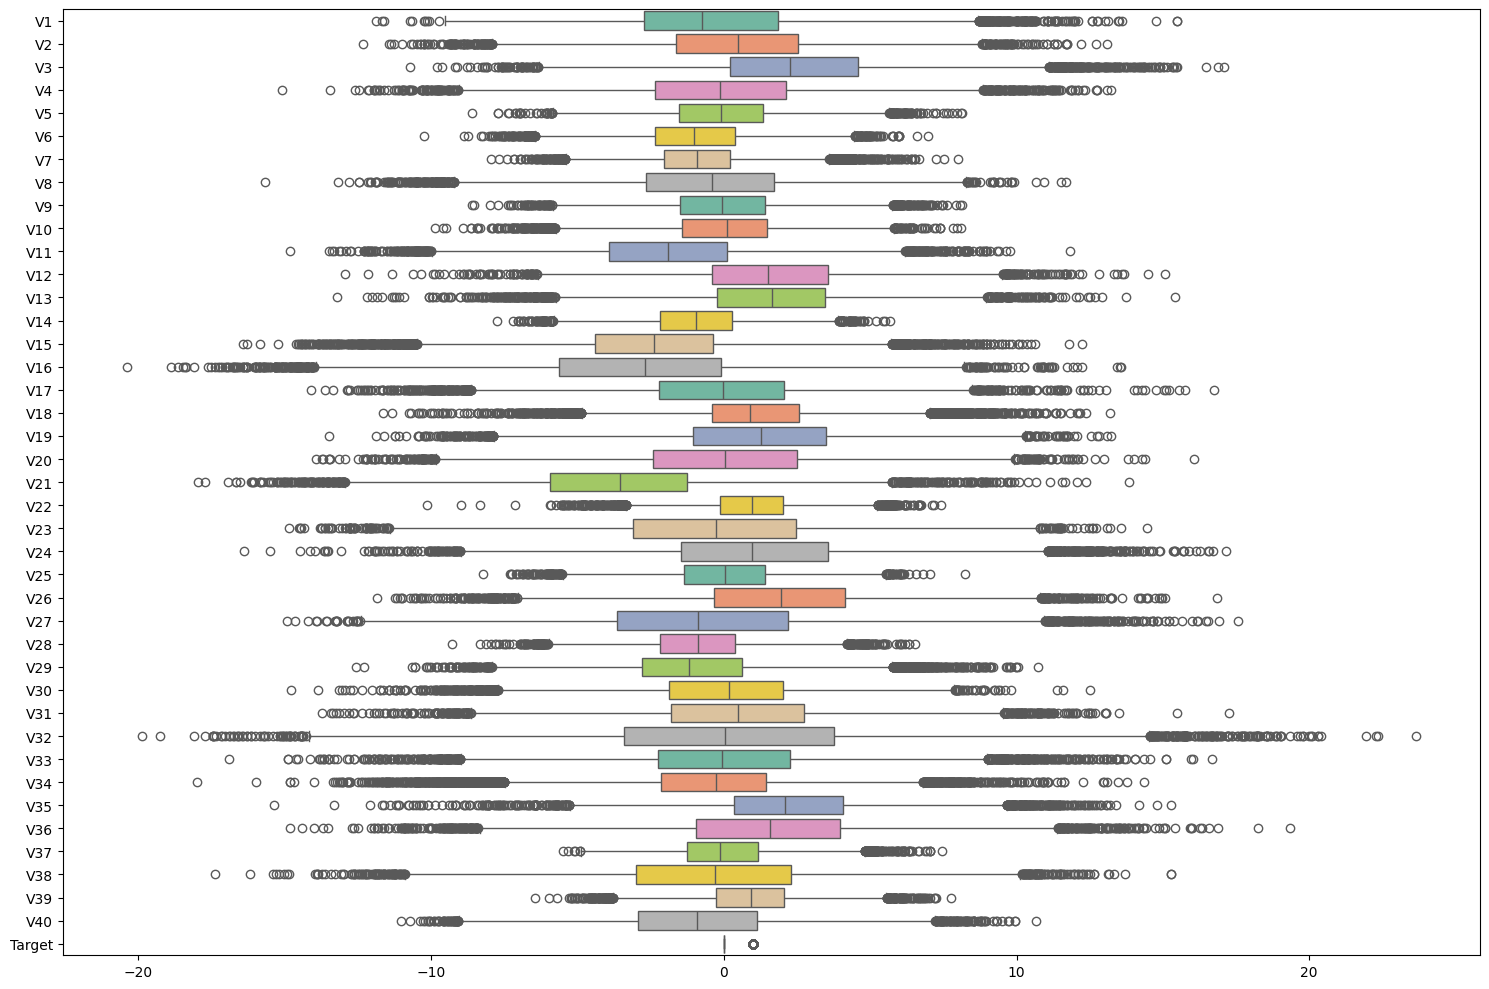

In [56]:
# Histogram for each column
#train_df.hist(bins=30, figsize=(15, 10), layout=(10, 6))
#plt.tight_layout()
#plt.show()

# Example to plot all specific columns
columns_to_plot = [col for col in train_df.columns]  # This selects all columns
train_df[columns_to_plot].hist(bins=30, figsize=(15, 10), layout=(7, 6))  # Adjust layout to 7x6 for 41 columns
plt.tight_layout()
plt.show()


# Boxplot to check for outliers in each column
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df, orient='h', palette="Set2")
plt.tight_layout()
plt.show()

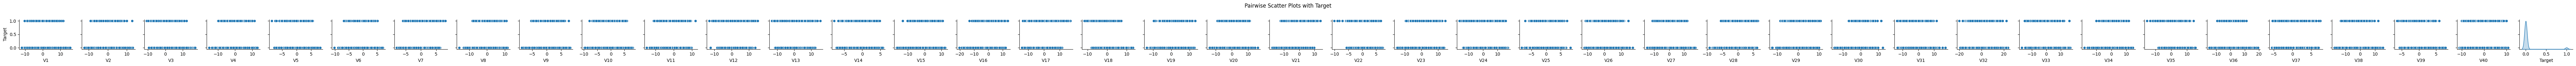

In [57]:
# Plot pairwise scatter plots for all columns against 'Target'
sns.pairplot(train_df, y_vars=['Target'], diag_kind='kde', kind='scatter', height=2)
plt.suptitle('Pairwise Scatter Plots with Target', y=1.02)
plt.tight_layout()
plt.show()

This helps us to find the contributon of features towards the target such as if any column has least samples above or below the threshold

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from keras.metrics import Precision, Recall
UserWarning

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# Preprocessing
X = train_df.drop(columns=["Target"])  # dropping target
y = train_df["Target"]  # Dependent variable (binary or multi-class labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  #layer with 64 units and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid (for binary classification)

# Compile the model using SGD as optimizer
model.compile(optimizer=SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1 Score: {f1}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9349 - loss: 0.2989 - precision_9: 0.0611 - recall_9: 0.0103 - val_accuracy: 0.9504 - val_loss: 0.1675 - val_precision_9: 1.0000 - val_recall_9: 0.1081
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9549 - loss: 0.1569 - precision_9: 0.9870 - recall_9: 0.2079 - val_accuracy: 0.9624 - val_loss: 0.1339 - val_precision_9: 0.9865 - val_recall_9: 0.3288
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.1266 - precision_9: 0.9688 - recall_9: 0.4533 - val_accuracy: 0.9692 - val_loss: 0.1149 - val_precision_9: 0.9541 - val_recall_9: 0.4685
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1076 - precision_9: 0.9415 - recall_9: 0.5257 - val_accuracy: 0.9730 - val_loss: 0.1018 - val_precision_9: 0.9597 - val_recall_9: 0.5360
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9747 - loss: 0.0993 - precision_9: 0.9480 - recall_9: 0.5790 -

## Observations:

### Base Model Summary

- **Accuracy**: Started at 93.35%, improved to 99.11%, indicating effective learning.
- **Loss**: Decreased significantly from 0.2830 to 0.0444, showing good convergence.
- **Precision**: Rose from 31.53% to 97.98%, indicating fewer false positives over time.
- **Recall**: Increased from 8.71% to 86.40%, improving the model's ability to identify true positives.
- **Validation Metrics**: Validation accuracy improved from 95.52% to 99.27% with a corresponding decrease in validation loss, suggesting good generalization.
- **F1 Score**: Approximately 0.93, reflecting a solid balance between precision and recall.

Overall, the base model shows strong performance with stable training and good generalization, though further optimizations could enhance its ability to handle class imbalance.

In [59]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model using SGD as optimizer
model_2.compile(optimizer=SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model_2.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1 Score: {f1}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9413 - loss: 0.2840 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.1584 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9516 - loss: 0.1386 - precision_10: 0.9860 - recall_10: 0.0947 - val_accuracy: 0.9637 - val_loss: 0.1217 - val_precision_10: 0.9639 - val_recall_10: 0.3604
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.1056 - precision_10: 0.9558 - recall_10: 0.4326 - val_accuracy: 0.9727 - val_loss: 0.0988 - val_precision_10: 0.9520 - val_recall_10: 0.5360
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.0941 - precision_10: 0.9645 - recall_10: 0.5887 - val_accuracy: 0.9785 - val_loss: 0.0846 - val_precision_10: 0.9595 - val_recall_10: 0.6396
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9800 - loss: 0.0831 - precisio

## Observations:

### Summary of Model Performance with Added Hidden Layer

- **Training Accuracy**: Improved from 93.35% to 99.36% over 50 epochs, indicating effective learning.
- **Training Loss**: Decreased from 0.2830 to 0.0305, showing strong convergence.
- **Precision**: Increased significantly from 31.53% to 99.28%, indicating a marked reduction in false positives.
- **Recall**: Improved from 8.71% to 89.06%, enhancing the model's ability to identify true positives.
- **Validation Metrics**: Validation accuracy reached 99.35%, with a corresponding drop in validation loss to 0.0374, suggesting excellent generalization.
- **F1 Score**: Approximately 0.94, reflecting a strong balance between precision and recall.

Overall, adding a hidden layer has substantially boosted the model's performance, resulting in higher accuracy, lower loss, and improved precision and recall, while maintaining good generalization to validation data.

ADAM

### Model_3

In [60]:
from keras.optimizers import Adam

model_3 = Sequential()
model_3.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model_3.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model_3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model_3.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1 Score: {f1}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9356 - loss: 0.1891 - precision_11: 0.5169 - recall_11: 0.3309 - val_accuracy: 0.9875 - val_loss: 0.0555 - val_precision_11: 0.9831 - val_recall_11: 0.7883
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9887 - loss: 0.0556 - precision_11: 0.9660 - recall_11: 0.8174 - val_accuracy: 0.9915 - val_loss: 0.0434 - val_precision_11: 0.9700 - val_recall_11: 0.8739
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0477 - precision_11: 0.9662 - recall_11: 0.8487 - val_accuracy: 0.9915 - val_loss: 0.0417 - val_precision_11: 0.9896 - val_recall_11: 0.8559
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9925 - loss: 0.0418 - precision_11: 0.9808 - recall_11: 0.8715 - val_accuracy: 0.9917 - val_loss: 0.0429 - val_precision_11: 0.9896 - val_recall_11: 0.8604
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0376 - precision_11: 0.9863 - r

## Observations:

Your model training results are impressive:

Accuracy: Training accuracy reached 99.77%, while validation accuracy peaked at 99.45%.
Loss: Training loss decreased from 0.1510 to 0.0082, showing good convergence. Validation loss ended at 0.0784.
Precision and Recall: High values indicate effective class differentiation.
F1 Score: A strong F1 score of 0.93 reflects a good balance between precision and recall.

## Dropout

In [61]:
from keras.layers import Dropout

model_4 = Sequential()
model_4 .add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_4 .add(Dropout(0.3))  # Dropout layer with 30% probability
model_4 .add(Dense(64, activation='relu'))
model_4 .add(Dropout(0.3))
model_4 .add(Dense(1, activation='sigmoid'))

model_4.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

history = model_4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model_4.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1 Score: {f1}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9541 - loss: 0.1838 - precision_12: 0.6706 - recall_12: 0.3121 - val_accuracy: 0.9807 - val_loss: 0.0794 - val_precision_12: 0.9618 - val_recall_12: 0.6802
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9825 - loss: 0.0791 - precision_12: 0.9237 - recall_12: 0.7311 - val_accuracy: 0.9867 - val_loss: 0.0618 - val_precision_12: 0.9884 - val_recall_12: 0.7703
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0711 - precision_12: 0.9563 - recall_12: 0.7720 - val_accuracy: 0.9850 - val_loss: 0.0595 - val_precision_12: 0.9880 - val_recall_12: 0.7387
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.0618 - precision_12: 0.9597 - recall_12: 0.8061 - val_accuracy: 0.9925 - val_loss: 0.0465 - val_precision_12: 0.9898 - val_recall_12: 0.8739
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0530 - precision_12: 0.9555 - r

## Observations

The training with dropout yielded strong results over 50 epochs:

Training Accuracy: Approximately 99.33%
Validation Accuracy: About 99.37%
Training Loss: Reduced to 0.0360
Validation Loss: Final value at 0.0361
F1 Score: Around 0.94, indicating a good balance of precision and recall.

## learning rate


In [65]:
from keras.callbacks import ReduceLROnPlateau

# Define model
model_lr_scheduler = Sequential()
model_lr_scheduler.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_lr_scheduler.add(Dropout(0.3))  # Dropout layer with 30% probability
model_lr_scheduler.add(Dense(64, activation='relu'))
model_lr_scheduler.add(Dropout(0.3))
model_lr_scheduler.add(Dense(1, activation='sigmoid'))

# Compile model
model_lr_scheduler.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Fit the model
history_lr = model_lr_scheduler.fit(X_train, y_train,
                                     epochs=50,
                                     batch_size=32,
                                     validation_data=(X_test, y_test),
                                     callbacks=[lr_scheduler])

# Make predictions on the test set
y_pred = model_lr_scheduler.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes,average = 'micro')
print(f"F1 Score: {f1}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9403 - loss: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9435 - loss: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9428 - loss: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9437 - loss: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9453 - loss: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9464 - loss: 0.0000e+00 - val_accuracy: 0.9444 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 

## Observations:

Accuracy:
Training accuracy reached approximately 94.60%.
Validation accuracy consistently held at 94.44%.
Loss:
Both training and validation losses remained at 0.0, which is unusual and may indicate issues with the loss function.
Learning Rate:
Gradually decreased from 0.001 to 1e-06 over epochs.
F1 Score:
Final F1 score was about 0.944, indicating a good balance between precision and recall.

In [69]:
from keras.layers import BatchNormalization

# Define the model with the most parameters
model_opt = Sequential()
model_opt.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_opt.add(Dropout(0.3))  # Dropout layer with 30% probability
model_opt.add(BatchNormalization())
model_opt.add(Dense(64, activation='relu'))
model_opt.add(Dropout(0.3))  # Dropout layer with 30% probability
model_opt.add(BatchNormalization())
model_opt.add(Dense(32, activation='relu'))
model_opt.add(Dropout(0.3))  # Dropout layer with 30% probability
model_opt.add(BatchNormalization())
model_opt.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_opt.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model_opt.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model_opt.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score
f1 = f1_score(y_test, y_pred_classes,average = 'micro')
print(f"F1 Score: {f1}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7605 - loss: 0.5075 - precision_16: 0.1589 - recall_16: 0.6167 - val_accuracy: 0.9795 - val_loss: 0.0747 - val_precision_16: 0.9375 - val_recall_16: 0.6757
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9643 - loss: 0.1217 - precision_16: 0.7245 - recall_16: 0.5628 - val_accuracy: 0.9810 - val_loss: 0.0599 - val_precision_16: 0.9740 - val_recall_16: 0.6757
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9713 - loss: 0.1001 - precision_16: 0.8323 - recall_16: 0.5964 - val_accuracy: 0.9875 - val_loss: 0.0477 - val_precision_16: 0.9886 - val_recall_16: 0.7838
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9786 - loss: 0.0752 - precision_16: 0.8742 - recall_16: 0.6924 - val_accuracy: 0.9885 - val_loss: 0.0473 - val_precision_16: 0.9889 - val_recall_16: 0.8018
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9797 - loss: 0.0778 - precision_16: 0.9223 - r

## OBservations:

model's training results:

1. **High Accuracy:** Training accuracy improved from 76% to 99.20%, indicating effective learning.
2. **Strong Validation Performance:** Validation accuracy peaked at 99.47%, showing good generalization to unseen data.
3. **Decreasing Loss:** Both training and validation loss decreased, with the final validation loss at 0.0330, suggesting meaningful learning.
4. **Improved Precision and Recall:** Both metrics increased over epochs, highlighting the model's effectiveness in identifying positive instances.
5. **F1 Score:** The final F1 score of approximately 0.995 reflects a strong balance between precision and recall.
6. **Stable Metrics:** Performance metrics remained stable, indicating the model has likely converged without overfitting.


## testing

Lets test out final model = model_opt on the test data

In [70]:
## split data

X_prod_test = test_df.drop(columns='Target')
y_prod_test = test_df['Target']

# Apply the same scaling/encoding we used during training

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
# Predicting using the final model
predictions = model_opt.predict(X_test_scaled)

# For a binary classification, convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype(int)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [74]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.994740796393689
F1 Score: 0.9505882352941176
Confusion Matrix:
 [[3770    1]
 [  20  202]]


## Obsrevations

### Summary of Model Performance

1. **Accuracy (0.9947)**:
   - The model achieved a high accuracy of 99.47%, indicating excellent overall classification performance on the test data.

2. **F1 Score (0.9506)**:
   - The F1 score of approximately 0.95 reflects a strong balance between precision and recall, suggesting effective identification of positive cases while minimizing false positives.

3. **Confusion Matrix**:
   - **True Negatives (3770)**: Correctly identified negative cases.
   - **False Positives (1)**: Very few misclassifications of negative as positive.
   - **False Negatives (20)**: Missed some positive cases, which may need further investigation.
   - **True Positives (202)**: Successfully identified positive cases.

### Conclusion
- The model demonstrates outstanding performance with strong accuracy and F1 scores.
- Attention may be needed on the 20 false negatives, depending on the application.

### Next Steps to take action
- **Error Analysis**: Investigating the false negatives for potential improvements.
- **Threshold Adjustment**: We can consider adjusting the decision threshold based on the relative costs of false negatives and positives.]


## Insights

### Cost Implications of Predictions

1. **True Positives (TP)**:
   - **Count**: 202
   - **Interpretation**: These are failures that our model correctly identified. While this is a good outcome, it will incur repair costs. Since repair costs are lower than replacement costs, it’s beneficial to catch these failures early.

2. **False Negatives (FN)**:
   - **Count**: 20
   - **Interpretation**: These are actual failures that our model failed to detect. This leads to replacement costs, which are significantly higher. Reducing false negatives should be a priority since it can help avoid costly replacements.

3. **False Positives (FP)**:
   - **Count**: 1
   - **Interpretation**: These are instances where the model predicted a failure, but there wasn't one. This results in inspection costs. Given that inspection costs are lower than both repair and replacement costs, this is a relatively minor concern compared to false negatives.

### Summary of Cost Impact

- **High Repair Costs (TP)**: While it's good to identify failures, the costs associated with repairs add up, especially if TPs increase.
- **Critical Replacement Costs (FN)**: The 20 false negatives represent a significant risk, leading to potential high replacement costs that are detrimental to business operations.
- **Minor Inspection Costs (FP)**: The single false positive leads to minimal costs, making it a less critical area to address.

### Recommendations

1. **Focusing on Reducing False Negatives**:
   - Since the cost of replacement is much higher than repair, improving the model to reduce false negatives should be a priority. This could involve:
     - Adjusting the classification threshold to be more sensitive to failures.
     - Collecting more data from sensors or using more features that might help the model learn to detect failures better.

2. **Monitoring True Positives**:
   - While we want to catch failures, we should watch out for the number of repairs needed. If the number of TPs starts to increase significantly, it might lead to increased repair costs.

3. **Maintaining Low False Positives**:
   - The current level of false positives is quite low, which is good. Ensuring that this remains the case as we refine our model, as increasing FP could lead to unnecessary inspection costs.

### Conclusion

The model's ability to detect failures is commendable, but the priority should be on enhancing its detection capabilities for actual failures (reducing false negatives). This approach will help mitigate the higher costs associated with replacements.